<a href="https://colab.research.google.com/github/IvanovMaxim2000/Homework_AI/blob/main/ML_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 6
## Постановка задачи:

1.   Написать собственную реализацию Rejection sampling 
2.   Написать собственную реализацию метода Метрополиса-Гастингса
3.   Применить для тестовых функций плотности
4.   Построить график семплирования точек



## Импортирование библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Определим тестовые функции

In [185]:
def Laplass(x):
    return 3/2 * np.exp(-3*abs(x-1))

In [123]:
def dist_gaus(x:float) -> float:
    return (np.exp(-np.pi * x**2) / np.sqrt(np.pi))
  


## Реализация rejection sampling

В численном анализе и вычислительной статистике выборка отбраковки является основным методом, используемым для получения наблюдений из распределения . Его также обычно называют методом принятия-отклонения или «алгоритмом принятия-отклонения» и он представляет собой тип метода точного моделирования. Метод работает для любого распределения в ${}\mathbb {R} ^ {м}$ с плотностью .

In [209]:
def rejection_sampling(func, border, amount):

  inside_res = []
  outside_res = []

  left_border = border[0]
  right_border = border[1]
  while (len(inside_res) != amount):
    x = np.random.normal(left_border,right_border)
    y = np.random.normal()
    if (y < 0 or y > 2):
      continue
    if (y < func(x)):
      inside_res.append(np.array([x,y]))
    else:
      outside_res.append(np.array([x,y]))

  return np.array(inside_res), np.array(outside_res)


## Реализация метода Метрополиса-Гастингса

Алгоритм Метрополиса — Гастингса — алгоритм семплирования, использующийся, в основном, для сложных функций распределения. Он отчасти похож на алгоритм выборки с отклонением, однако здесь вспомогательная функция распределения меняется со временем.

Источник: https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9C%D0%B5%D1%82%D1%80%D0%BE%D0%BF%D0%BE%D0%BB%D0%B8%D1%81%D0%B0_%E2%80%94_%D0%93%D0%B0%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D1%81%D0%B0

In [117]:
def Metropolis_Hastings(func, start_point, amount):
  
  current_point=[start_point]

  while (len(current_point) != amount):
    new_point = np.random.normal(current_point[-1])
    ratio = func(new_point)/ func(current_point[-1])
    if (np.random.rand() < ratio):
        current_point.append(new_point)
    else:
        current_point.append(current_point[-1])
  
  return current_point

## Функция отрисовки результатов Rejection sampling

In [228]:
def draw_rejection_sampling(func, borders, amount):
  left_border = borders[0]
  right_border = borders[1]
  x = np.linspace(left_border, right_border, amount)
  y = func(x)

  inside_res, outside_res = rejection_sampling(func, borders, amount)
  fig, ax = plt.subplots(figsize=(8,5))
  ax.scatter(inside_res[:,0], inside_res[:,1], s=4)
  ax.scatter(outside_res[:,0], outside_res[:,1], s=4)
  ax.hist(inside_res[:, 0], 20, density=True, alpha = 0.75)
  ax.plot(x, y, lw=4)
  ax.set_xlim(borders[0], borders[1])



## Функция отрисовки результатов метода Метрополиса-Гастингса

In [162]:
def draw_Hastings_res(func, borders, amount, start = 1):
    x = np.linspace(borders[0], borders[1], amount)
    y = func(x)

    Hastings_res = Metropolis_Hastings(func, start, amount)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.hist(Hastings_res, 40, density=True, alpha = 0.75)
    ax.plot(x, y, lw=4)

    ax.set_xlim(borders[0], borders[1])


## Результаты Rejection sampling на тестовых функциях

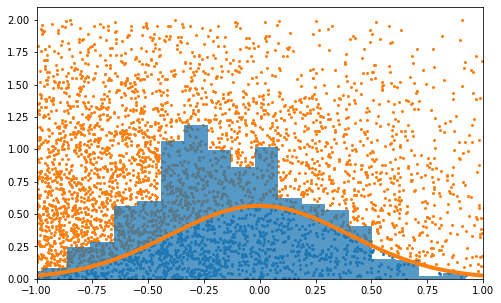

In [227]:
borders = np.array([-1, 1])
draw_rejection_sampling(dist_gaus, borders, 1000)

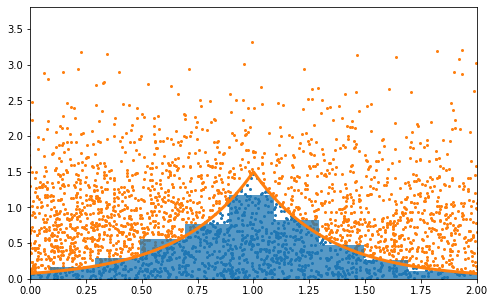

In [208]:
borders = np.array([0, 2])
draw_rejection_sampling(Laplass, borders, 1000)

## Результаты метода Метрополиса-Гастингса

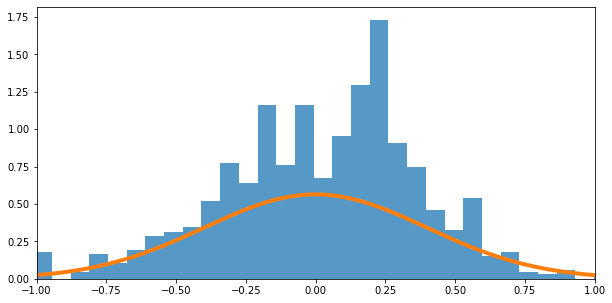

In [214]:
borders = np.array([-1, 1])
draw_Hastings_res(dist_gaus, borders, 1000)

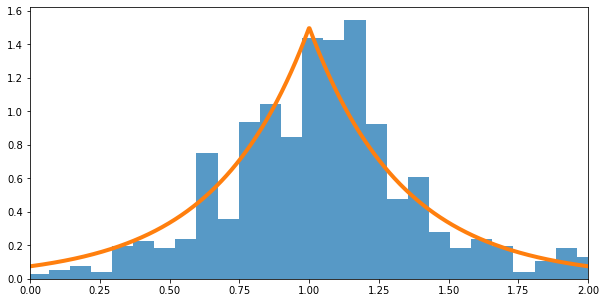

In [184]:
borders = np.array([0, 2])
draw_Hastings_res(Laplass, borders, 1000)